In [15]:
"""
Breakdown:
Train Data:

Calculate 7-day and 30-day moving averages of sales and plot the trends.
Oil Data:

Calculate 7-day and 30-day moving averages of oil prices (dcoilwtico) and plot the trends.
Transactions Data:

Aggregate transactions by store and date, calculate 7-day and 30-day moving averages, and plot the trends.
Holidays Data:

Count the number of holidays for each date and visualize the occurrence of holidays over time with a bar plot.
"""

'\nBreakdown:\nTrain Data:\n\nCalculate 7-day and 30-day moving averages of sales and plot the trends.\nOil Data:\n\nCalculate 7-day and 30-day moving averages of oil prices (dcoilwtico) and plot the trends.\nTransactions Data:\n\nAggregate transactions by store and date, calculate 7-day and 30-day moving averages, and plot the trends.\nHolidays Data:\n\nCount the number of holidays for each date and visualize the occurrence of holidays over time with a bar plot.\n'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load CSV files
train_path = r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting\train.csv'
oil_path = r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting\oil.csv'
transactions_path = r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting\transactions.csv'
holidays_path = r'D:\DepiTasks\Retail-Sales-Project\store-sales-time-series-forecasting\holidays_events.csv'

# Load datasets
train = pd.read_csv(train_path)
oil = pd.read_csv(oil_path)
transactions = pd.read_csv(transactions_path)
holidays = pd.read_csv(holidays_path)

In [6]:
# Convert 'date' columns to datetime format, letting pandas infer the format
train['date'] = pd.to_datetime(train['date'], infer_datetime_format=True)
oil['date'] = pd.to_datetime(oil['date'], infer_datetime_format=True)
transactions['date'] = pd.to_datetime(transactions['date'], infer_datetime_format=True)
holidays['date'] = pd.to_datetime(holidays['date'], infer_datetime_format=True)

C:\Users\Zahran\AppData\Local\Temp\ipykernel_17328\3888699141.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train['date'] = pd.to_datetime(train['date'], infer_datetime_format=True)
C:\Users\Zahran\AppData\Local\Temp\ipykernel_17328\3888699141.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  oil['date'] = pd.to_datetime(oil['date'], infer_datetime_format=True)
C:\Users\Zahran\AppData\Local\Temp\ipykernel_17328\3888699141.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version 

In [7]:
### 1. Train Data: Moving Averages for Sales ###
train_grouped = train.groupby(['date', 'store_nbr']).agg({'sales': 'sum'}).reset_index()
train_grouped.set_index('date', inplace=True)
train_grouped['7_day_ma'] = train_grouped['sales'].rolling(window=7).mean()
train_grouped['30_day_ma'] = train_grouped['sales'].rolling(window=30).mean()

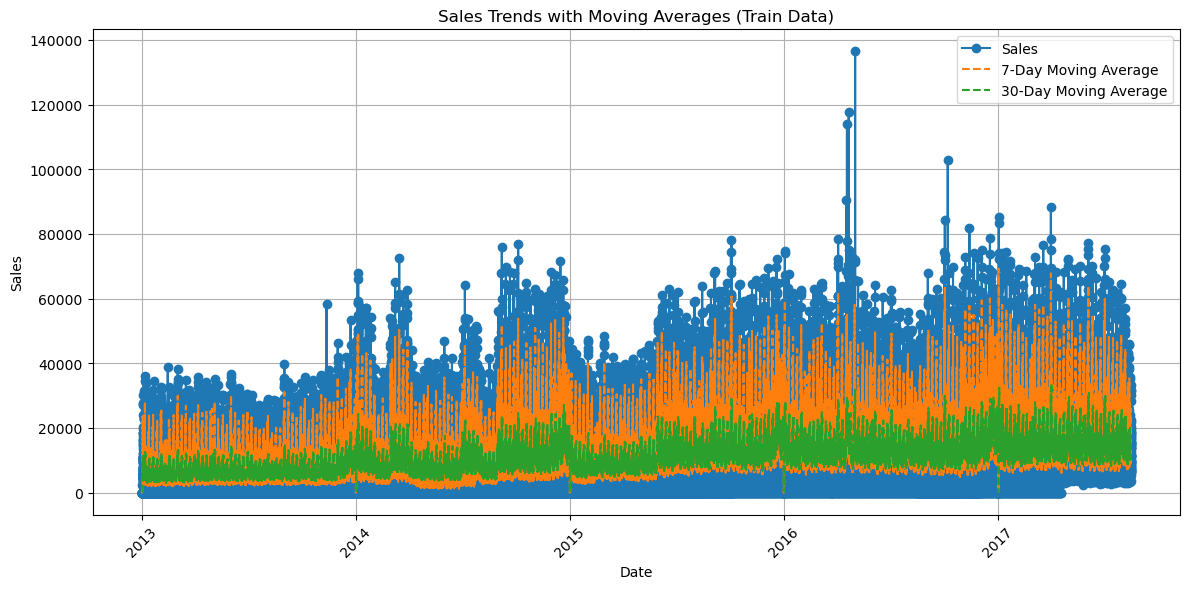

In [8]:
# Plot sales trends for train.csv
plt.figure(figsize=(12,6))
plt.plot(train_grouped.index, train_grouped['sales'], label='Sales', marker='o', linestyle='-')
plt.plot(train_grouped.index, train_grouped['7_day_ma'], label='7-Day Moving Average', linestyle='--')
plt.plot(train_grouped.index, train_grouped['30_day_ma'], label='30-Day Moving Average', linestyle='--')
plt.title('Sales Trends with Moving Averages (Train Data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
### 2. Oil Data: Moving Averages for Oil Prices ###
# Remove missing values from oil prices before calculating moving averages
oil_clean = oil.dropna(subset=['dcoilwtico'])
oil_clean.set_index('date', inplace=True)
oil_clean['7_day_ma'] = oil_clean['dcoilwtico'].rolling(window=7).mean()
oil_clean['30_day_ma'] = oil_clean['dcoilwtico'].rolling(window=30).mean()

C:\Users\Zahran\AppData\Local\Temp\ipykernel_17328\3617080930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_clean['7_day_ma'] = oil_clean['dcoilwtico'].rolling(window=7).mean()
C:\Users\Zahran\AppData\Local\Temp\ipykernel_17328\3617080930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_clean['30_day_ma'] = oil_clean['dcoilwtico'].rolling(window=30).mean()


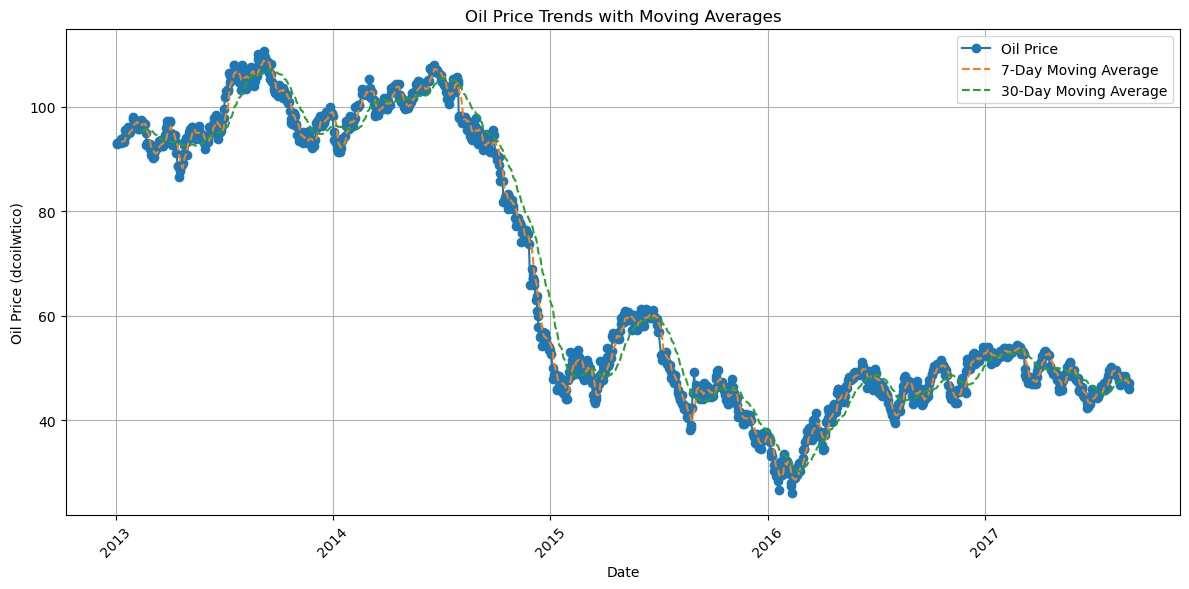

In [10]:
# Plot oil price trends
plt.figure(figsize=(12,6))
plt.plot(oil_clean.index, oil_clean['dcoilwtico'], label='Oil Price', marker='o', linestyle='-')
plt.plot(oil_clean.index, oil_clean['7_day_ma'], label='7-Day Moving Average', linestyle='--')
plt.plot(oil_clean.index, oil_clean['30_day_ma'], label='30-Day Moving Average', linestyle='--')
plt.title('Oil Price Trends with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Oil Price (dcoilwtico)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
### 3. Transactions Data: Moving Averages for Store Transactions ###
transactions_grouped = transactions.groupby(['date', 'store_nbr']).agg({'transactions': 'sum'}).reset_index()
transactions_grouped.set_index('date', inplace=True)
transactions_grouped['7_day_ma'] = transactions_grouped['transactions'].rolling(window=7).mean()
transactions_grouped['30_day_ma'] = transactions_grouped['transactions'].rolling(window=30).mean()

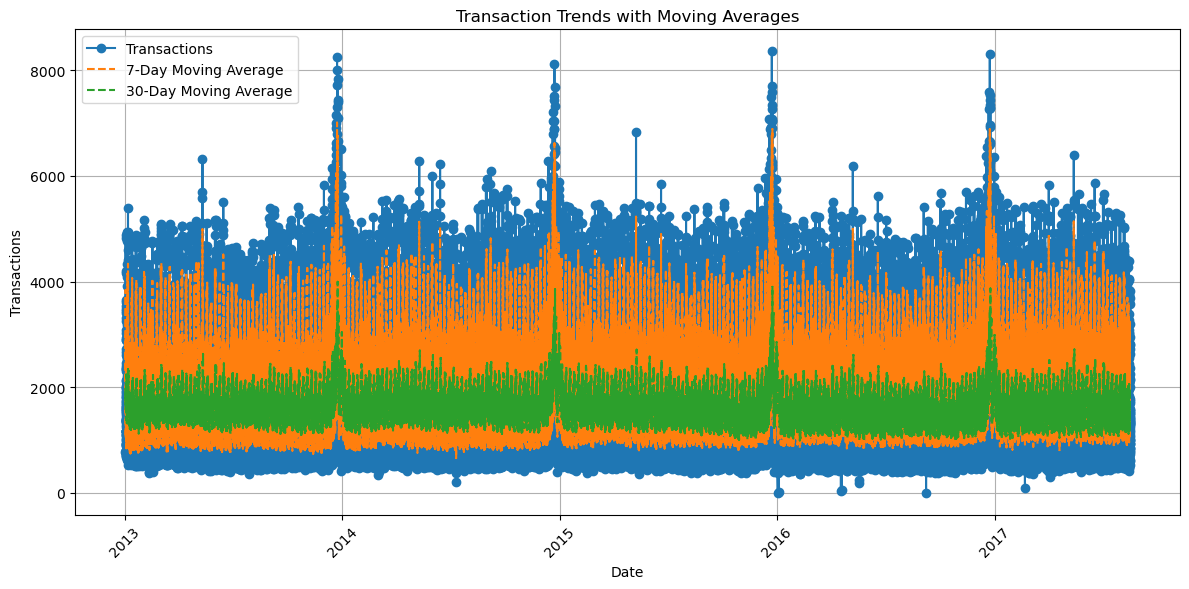

In [12]:
# Plot transaction trends
plt.figure(figsize=(12,6))
plt.plot(transactions_grouped.index, transactions_grouped['transactions'], label='Transactions', marker='o', linestyle='-')
plt.plot(transactions_grouped.index, transactions_grouped['7_day_ma'], label='7-Day Moving Average', linestyle='--')
plt.plot(transactions_grouped.index, transactions_grouped['30_day_ma'], label='30-Day Moving Average', linestyle='--')
plt.title('Transaction Trends with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
### 4. Holidays Data: Visualizing Holiday Occurrences ###
holidays_counts = holidays['date'].value_counts().sort_index()

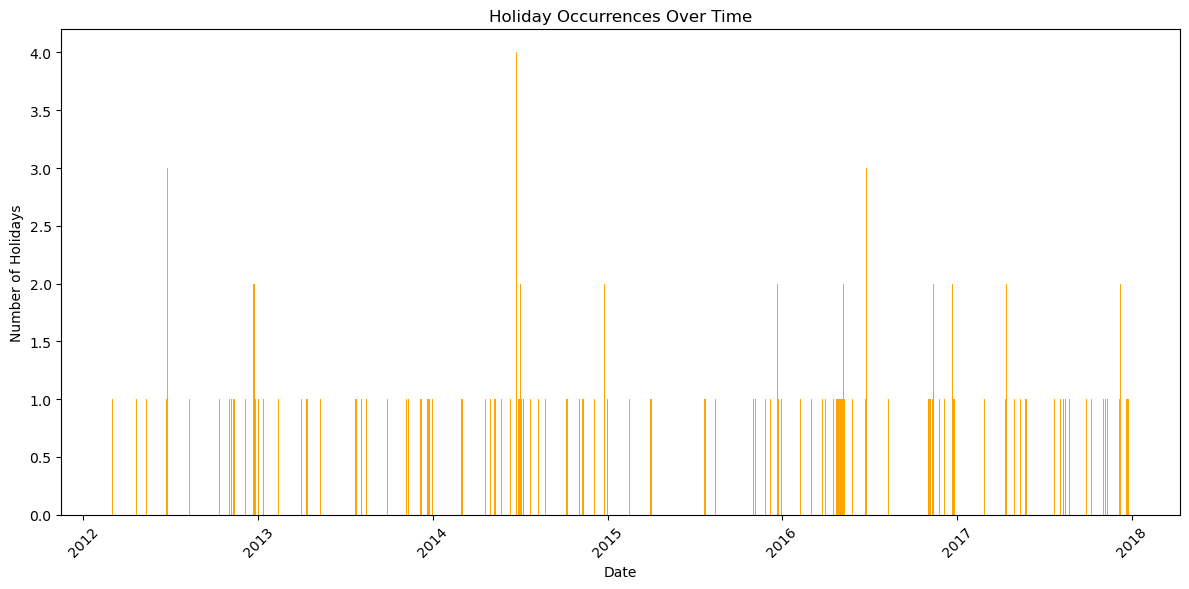

In [14]:
# Plotting the number of holidays over time
plt.figure(figsize=(12,6))
plt.bar(holidays_counts.index, holidays_counts.values, color='orange')
plt.title('Holiday Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Holidays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()